In [9]:
gpt2_train = [5.8674, 0.7360, 0.5662, 0.5251]
gpt2_eval = [5.8674, 0.5555, 0.5416, 0.5384]

gpt2_train_lora = [5.8674, 1.2568, 0.7473, 0.7168]
gpt2_eval_lora = [5.8674, 0.6948, 0.6493, 0.6388]

gpt2_medium_train = [5.5511, 0.6505, 0.5189, 0.4379]
gpt2_medium_eval = [5.5511, 0.5439, 0.5315, 0.5453]

gpt2_medium_train_lora = [5.5511, 0.8967, 0.6267, 0.6116]
gpt2_medium_eval_lora = [5.5511, 0.5877, 0.5677, 0.5613]

gpt2_large_train = [5.8433, 0.7438, 0.5718, 0.4403]
gpt2_large_eval = [5.8433, 0.6045, 0.5756, 0.5943]

gpt2_large_train_lora = [5.8433, 0.7107, 0.5887, 0.5739]
gpt2_large_eval_lora = [5.8433, 0.5527, 0.5401, 0.5347]

gpt2 = [gpt2_train, gpt2_eval]
gpt2_lora = [gpt2_train_lora, gpt2_eval_lora]
gpt2_medium = [gpt2_medium_train, gpt2_medium_eval]
gpt2_medium_lora = [gpt2_medium_train_lora, gpt2_medium_eval_lora]
gpt2_large = [gpt2_large_train, gpt2_large_eval]
gpt2_large_lora = [gpt2_large_train_lora, gpt2_large_eval_lora]

models = [["GPT-2", gpt2, gpt2_lora], ["GPT-2 Medium", gpt2_medium, gpt2_medium_lora], ["GPT-2 Large", gpt2_large, gpt2_large_lora]]

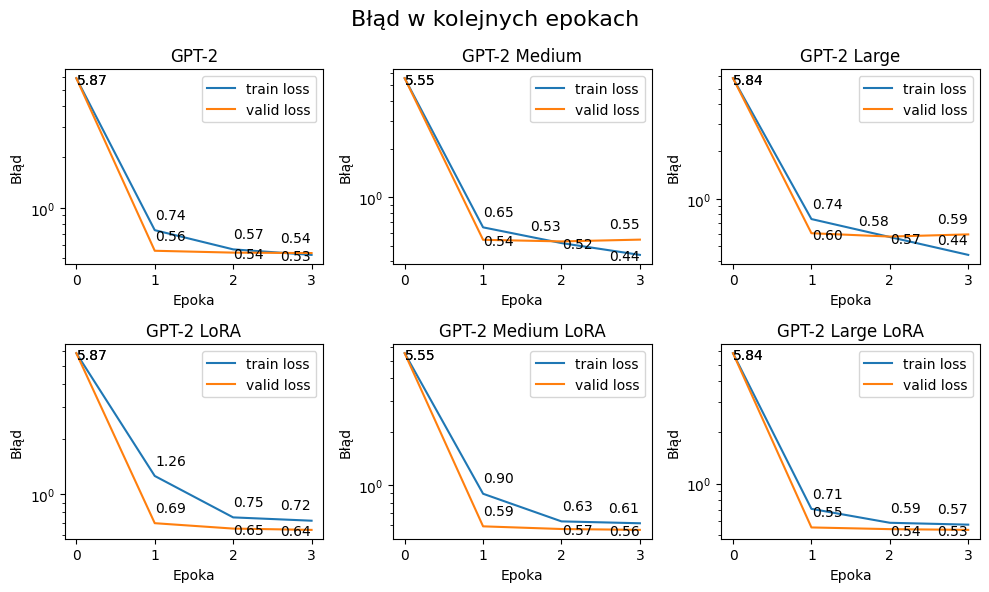

In [24]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

counter = 0
fig, axs = plt.subplots(2, len(models), figsize=(10, 6))
fig.suptitle("Błąd w kolejnych epokach", fontsize=16)
for name, model, model_lora in models:
    epochs = [i for i in range(4)]

    # Plot on the left column
    axs[0, counter].plot(epochs, model[0], label="train loss")
    axs[0, counter].plot(epochs, model[1], label="valid loss")
    axs[0, counter].legend()
    axs[0, counter].set_title(name)
    axs[0, counter].set_xlabel("Epoka")
    axs[0, counter].set_ylabel("Błąd")
    axs[0, counter].set_yscale("log")
    
    # Annotate the points for the left column plot with adjustText
    texts = []
    for x, y in zip(epochs, model[0]):
        texts.append(axs[0, counter].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center'))
    for x, y in zip(epochs, model[1]):
        texts.append(axs[0, counter].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center'))
    adjust_text(texts, ax=axs[0, counter])

    # Plot on the right column
    axs[1, counter].plot(epochs, model_lora[0], label="train loss")
    axs[1, counter].plot(epochs, model_lora[1], label="valid loss")
    axs[1, counter].legend()
    axs[1, counter].set_title(name + " LoRA")
    axs[1, counter].set_xlabel("Epoka")
    axs[1, counter].set_ylabel("Błąd")
    axs[1, counter].set_yscale("log")

    # Annotate the points for the right column plot with adjustText
    texts = []
    for x, y in zip(epochs, model_lora[0]):
        texts.append(axs[1, counter].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center'))
    for x, y in zip(epochs, model_lora[1]):
        texts.append(axs[1, counter].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center'))
    adjust_text(texts, ax=axs[1, counter])

    counter += 1

fig.tight_layout()
plt.savefig("loss.png", dpi=300)

# Show the plot
plt.show()


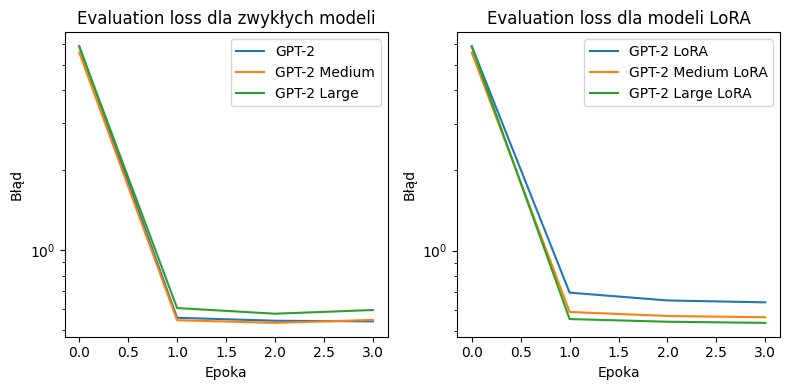

In [19]:
import matplotlib.pyplot as plt

counter = 0
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for name, model, model_lora in models:
    epochs = [i for i in range(4)]

    axs[0].plot(epochs, model[1], label=name)
    axs[0].legend()
    axs[0].set_title("Evaluation loss dla zwykłych modeli")
    axs[0].set_xlabel("Epoka")
    axs[0].set_ylabel("Błąd")
    axs[0].set_yscale("log")
    
    axs[1].plot(epochs, model_lora[1], label=name+" LoRA")
    axs[1].legend()
    axs[1].set_title("Evaluation loss dla modeli LoRA")
    axs[1].set_xlabel("Epoka")
    axs[1].set_ylabel("Błąd")
    axs[1].set_yscale("log")

fig.tight_layout()

plt.savefig("eval_loss.png", dpi=300)
# Show the plot
plt.show()